<a href="https://colab.research.google.com/github/rowel27/Simple-Neural-Network/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [128]:
#Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 features of the flower) -->
  # Hidden Layer 1(number of neurons) -->
  # H2 (n) -->
  # output(3 classes of iris flowers)
  def __init__(self, in_features=4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [129]:
torch.manual_seed(27)
model = Model()

In [130]:
import matplotlib.pyplot as plt

In [131]:
%matplotlib inline
import pandas as pd

In [132]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [133]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [134]:
#Change last column of strings to double
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

/tmp/ipython-input-2766277872.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [135]:
#Train Test Split! Set X, y
X = my_df.drop('species', axis = 1)
y = my_df['species']


In [136]:
X = X.values
y = y.values

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=27)

In [139]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [140]:
#Set the Criterion of model to measure the error, how far off the predictions are form the variable
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer, lr = learning rate (if error doesnt go down after a bunh of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(),lr=0.12)

In [141]:
epochs = 200
losses = []
for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(X_train)

  #Measure the loss/error, high at first
  loss = criterion(y_pred,y_train)
  #Keep Track of our losses
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')
    # Do some back propagation: take the error rate of forward prpagation and feed it back
    # through the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch: 0 and loss: 1.092576503753662
Epoch: 10 and loss: 1.1478019952774048
Epoch: 20 and loss: 1.0331441164016724
Epoch: 30 and loss: 1.0554335117340088
Epoch: 40 and loss: 0.9548660516738892
Epoch: 50 and loss: 0.8718111515045166
Epoch: 60 and loss: 0.7349742650985718
Epoch: 70 and loss: 0.6038144826889038
Epoch: 80 and loss: 0.519435465335846
Epoch: 90 and loss: 0.44586122035980225
Epoch: 100 and loss: 0.3490632474422455
Epoch: 110 and loss: 0.31385618448257446
Epoch: 120 and loss: 0.3022673726081848
Epoch: 130 and loss: 0.37512364983558655
Epoch: 140 and loss: 0.2628882825374603
Epoch: 150 and loss: 0.23622600734233856
Epoch: 160 and loss: 0.22086675465106964
Epoch: 170 and loss: 0.15758322179317474
Epoch: 180 and loss: 0.1711861491203308
Epoch: 190 and loss: 0.11771981418132782


Text(0.5, 0, 'Epoch')

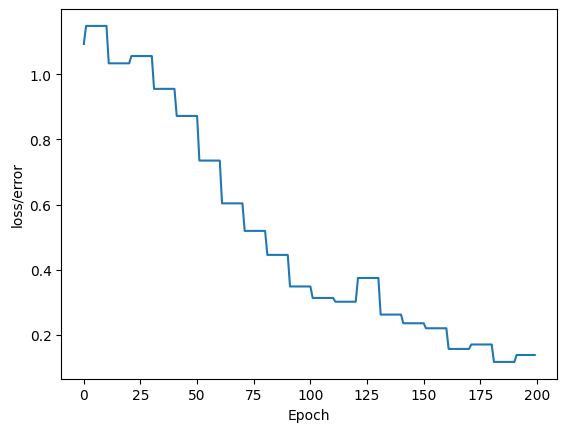

In [142]:
 #Graph it out
 plt.plot(range(epochs), losses)
 plt.ylabel("loss/error")
 plt.xlabel('Epoch')

In [143]:
with torch.no_grad():#Basically turn off back propogation
  y_eval = model.forward(X_test) #X_test are features from our test set, u_val will be
  loss = criterion(y_eval, y_test) #Find the loss or error


In [144]:
loss

tensor(0.1732)

In [145]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    #What type of flower the net work thinks it is
    print(f'{i+1}.) {str(y_val)} \t{y_test[i]} \t{y_val.argmax().item()}')

    #Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.) tensor([-13.4653,   4.5408,   4.8207]) 	2 	2
2.) tensor([ 9.5802e+00, -7.8787e-03, -1.7856e+01]) 	0 	0
3.) tensor([-16.0823,   4.4417,   7.0558]) 	2 	2
4.) tensor([-16.4659,   5.0528,   6.4765]) 	2 	2
5.) tensor([-6.9613,  4.1484, -0.2626]) 	1 	1
6.) tensor([-7.7619,  4.5294, -0.2465]) 	1 	1
7.) tensor([-8.8412,  4.3844,  1.0319]) 	1 	1
8.) tensor([-14.7315,   4.4444,   5.9640]) 	2 	2
9.) tensor([-11.3051,   4.6626,   2.7878]) 	1 	1
10.) tensor([  8.7960,   0.0757, -16.4675]) 	0 	0
11.) tensor([-8.1499,  4.1601,  0.8182]) 	1 	1
12.) tensor([-11.3494,   4.4867,   3.1645]) 	2 	1
13.) tensor([  8.1920,   0.1401, -15.3981]) 	0 	0
14.) tensor([-8.6078,  4.1201,  1.3195]) 	1 	1
15.) tensor([-8.6333,  4.6252,  0.3794]) 	1 	1
16.) tensor([-6.9552,  4.1699, -0.3092]) 	1 	1
17.) tensor([  8.4773,   0.1097, -15.9031]) 	0 	0
18.) tensor([-15.9170,   4.6746,   6.5732]) 	2 	2
19.) tensor([-14.4573,   4.3439,   5.9033]) 	2 	2
20.) tensor([-18.3791,   4.9976,   8.0782]) 	2 	2
21.) tensor([-7.8786,

In [146]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [147]:
with torch.no_grad():
  print(model(new_iris))

tensor([  8.4071,   0.1172, -15.7788])


In [149]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])

In [150]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-12.3149,   4.2602,   4.3161])


In [152]:
torch.save(model.state_dict(), 'iris_model.pt')

In [153]:
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [154]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)